In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Conditional Statements

In [2]:
def sign(x):
    print(x, 'is', end = ' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
-3 is negative
0 is zero


## For Statements

In [3]:
np.append(make_array(1, 2, 3), 4)

array([1, 2, 3, 4])

In [4]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [5]:
np.arange(4)

array([0, 1, 2, 3])

In [6]:
for i in np.arange(4):
    print('Iteration:', i )

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


# Simulation (Inferential Thinking & Lecture Video)

Simulation is the **process of using a computer to mimic a physical experiment**. In this class, those experiments will almost invariably involve chance.

Previously, we simulated the results of coin tosses. The steps in that simulation were examples of the steps that will constitute every simulation we do in this course. In this section we will set out those steps and follow them in examples.

### Step 1: What to Simulate
Specify the quantity you want to simulate. For example, you might decide that you want to simulate the outcomes of coin tosses.

### Step 2: Simulating One Value
Figure out how to simulate 1 value of the quantity you specified in Step 1. In our example, you have to figure out how to simulate the outcome of a coin toss. If your quantity is complicated, you might need several lines of code to come up with one simulated value.

### Step 3: Number of Repetition
Decide how many times you want to simulate the quantity. You will have to repeat Step 2 that many times. In previous examples we simulated the outcomes of 1000 tosses of a coin, and so we needed 1000 repetitions of generating the outcome of a single toss.

### Step 4: Coding the Simulation
* Create an empty array to collect all the simulated values
    * Call this the `collection array`
* Create a “repetitions sequence" 
    * A sequence whose length is the number of repetitions you specified in Step 3
    * For n repetitions we will almost always use the sequence `np.arange(n)`
* Create a `for` loop. For each element of the repetitions sequence:
    * Simulate one value based on the code you developed in Step 2.
    * Augment the collection array with this simulated value.

Once you have carried out the steps above, your simulation is done. The collection array contains all the simulated values.

At this point you can use the collection array as you would any other array. You can visualize the distribution of the simulated values, count how many simulated values fall into a particular category, and so on.

### Number of 'Heads' in 100 Tosses
It is natural to expect that in 100 tosses of a coin, there will be 50 heads, give or take a few.

But how many is “a few”? What’s the chance of getting exactly 50 heads? Questions like these matter in data science not only because they are about interesting aspects of randomness, but also because they can be used in analyzing experiments where assignments to treatment and control groups are decided by the toss of a coin.

In this example we will **simulate the number of heads in 100 tosses of a coin**. The histogram of our results will give us some insight into how many heads are likely.

Let’s get started on the simulation, following the steps above.

### Step 1: What to Simulate
The quantity we are going to simulate is **the number of heads in 100 coin tosses**.

### Step 2: Simulating One Value
We have to figure out how to make one set of 100 tosses and count the number of heads. Let’s start by creating a coin.

In [7]:
# Create a 'coin', which is an array that containts 'heads' and 'tails'
coin = make_array('Heads', 'Tails')
coin

array(['Heads', 'Tails'], dtype='<U5')

We used `np.random.choice` and a `for` loop to generate multiple tosses. But sets of coin tosses are needed so often in data science that np.random.choice simulates them for us if we include a second argument that is the number of times to toss.

Here are the results of 10 tosses.

In [8]:
# Toss coin 10 times
np.random.choice(coin, 10)

array(['Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails'], dtype='<U5')

In [9]:
# Toss coin 10 times and counts how many 'heads' Python get
np.count_nonzero(np.random.choice(coin, 10) == 'Heads')

2

Our goal is to simulate the number of heads in 100 tosses, not 10. To do that we can just repeat the same code, replacing 10 by 100.

In [10]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

51

### Step 3: Number of Repetitions
How many repetitions we want is up to us. The more we use, the more reliable our simulations will be, but the longer it will take to run the code. Let’s go for 10,000 repetitions. That means we are going to do the following 20 times:

Toss a coin 100 times and count the number of heads.

### Step 4: Coding the Simulation

In [11]:
# Create an empty array that will contain the simulated values
heads = make_array()

# Create the repetitions sequence
num_repetitions = 10000
repetitions_sequence = np.arange(num_repetitions)

# for loop
for i in repetitions_sequence:
    
    # simulate one round of 100 coin tosses
    outcomes = np.random.choice(coin, 100)
    num_heads = np.count_nonzero(outcomes == 'Heads')
    
    # Add the result of the 100 coin tosses round to the array 'heads'
    heads = np.append(heads, num_heads)  
heads
# That's it! The simulation is done.

array([52., 44., 51., ..., 57., 44., 44.])

Check that the array heads contains 10,000 entries, one for each repetition of the experiment.

In [12]:
len(heads)

10000

To get a sense of the variability in the number of heads in 100 tosses, we can collect the results in a table and draw a histogram.

In [13]:
simulation_results = Table().with_column(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)
simulation_results

Repetition,Number of Heads
1,52
2,44
3,51
4,44
5,51
6,44
7,45
8,51
9,51
10,51


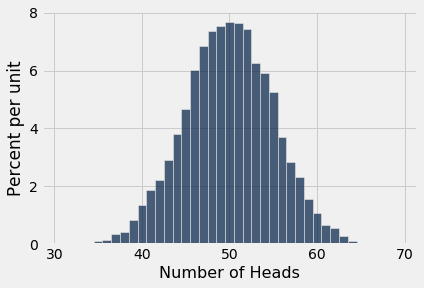

In [14]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

Each bins has width 1 and is centered at each value of the number of heads.

Not surprisingly, the histogram looks roughly symmetric around 50 heads. The height of the bar at 50 is about 8% per unit. Since each bin is 1 unit wide, this is the same as saying that about 8% of the repetitions produced exactly 50 heads. That’s not a huge percent, but it’s the largest compared to the percent at every other number of heads.

The histogram also shows that in almost all of the repetitions, the number of heads in 100 tosses was somewhere between 35 and 65. Indeed, the bulk of the repetitions produced numbers of heads in the range 45 to 55.

While in theory it is possible that the number of heads can be anywhere between 0 and 100, the simulation shows that the range of probable values is much smaller.

This is an instance of a more general phenomenon about the variability in coin tossing, as we will see later in the course.

### A More Compact Code
We wrote the code for the simulation to show each of the steps in detail. Here are the same steps written in a more compact form. You can see that the code starts out the same way as before, but then some steps are combined.

In [15]:
heads = make_array()

num_repetitions = 10000

for i in np.arange(num_repetitions):
    outcomes = np.random.choice(coin, 100)
    heads = np.append(heads, np.count_nonzero(outcomes == 'Heads'))
    
heads

array([60., 49., 40., ..., 47., 53., 55.])

### Moves in Monopoly
Each move in the game Monopoly is determined by the result of 2 rolls of a die. If you play Monopoly, what should you expect to get when you roll the die two times?

We can explore this by simulating the sum of 2 rolls of a die. We will run the simulation 10,000 times as we did in the previous example. Notice that is this paragraph we have completed Steps 1 and 3 of our simulation process.

Step 2 is the one in which we simulate one pair of rolls and add up the number of spots.

In [16]:
# 'die' is an array containing all possible scores you can get from a die (1-6)
die = np.arange(1, 7)
# Below: sum the result of rolling 2 die
sum(np.random.choice(die, 2))

8

That simulates a value of the sum of 2 rolls. We are now all set to run the simulation according to the steps that are now familiar.

In [17]:
# 'moves' is an array where each element contains the result of rolling 2 die
moves = make_array()

num_repetitions = 10000

for i in np.arange(num_repetitions):
    one_move = sum(np.random.choice(die, 2))
    moves = np.append(moves, one_move)

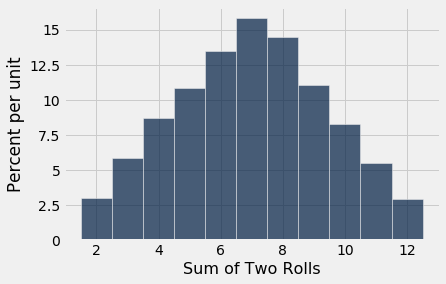

In [18]:
results = Table().with_column(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves
)

results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))

7 is the most common value, with the frequencies falling off symmetrically on either side.

## Control Statements
These statements control the sequence of computations that are performed in a program.
* The keywords `if` and `for` begin control statements
* The purpose of `if` is to define functions that choose different behavior based on their arguments
* The purpose of `for` is to perform a computation for every element in a list or array

## The [Monty Hall](https://en.wikipedia.org/wiki/Monty_Hall_problem) Problem
The setting is derived from a television game show called “Let’s Make a Deal”. Monty Hall hosted this show in the 1960’s, and it has since led to a number of spin-offs. An exciting part of the show was that while the contestants had the chance to win great prizes, they might instead end up with “zonks” that were less desirable. This is the basis for what is now known as the Monty Hall problem.

The setting is a game show in which the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn’t know where the car is, and has to attempt to find it under the following rules.

* The contestant makes an initial choice, but that door isn’t opened.
* At least one of the other 2 doors must have a goat behind it. Monty opens one of these doors to reveal a goat.
<img src = 'monty.png'/>
* There are 2 doors left, one of which was the contestant’s original choice
    * One of the doors has the car behind it, and the other one has a goat
    * The contestant now gets to choose which of the two doors to open
    
The contestant has a decision to make. Which door should he/she choose to open, if he/she wants the car? Should he/she stick with his/her initial choice, or switch to the other door? That is the Monty Hall problem.

## Video Lecture Version
Write down the steps of what we need to do:
1. Put prizes behind doors randomly
2. Pick a door
3. Monty opens a door
4. Reveal what was behind each door

In [19]:
# Create an array of doors and label them '1, 2, 3'
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [20]:
# Create an array of the prizes
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [21]:
# Choose a prize randomly
np.random.choice(prizes, 3, replace = False)
# By default. np.random.choice takes a random draw with replacement.
# This means it's possible to get 2 cars (i.e. ['car', 'first goat', 'car']).

# with replace = False, this can be avoided

array(['second goat', 'first goat', 'car'], dtype='<U11')

In [22]:
def setup():
    """ Return a random game of Let's Make a Deal """
    return Table().with_columns(
    'Door', doors,
    'Prize', np.random.choice(prizes, 3, replace = False)
    )

a_game = setup()
a_game

Door,Prize
1,car
2,first goat
3,second goat


**How would you define a function `behind` that takes in a game and a door number and returns the prize behind the door (e.g. `first goat`)?**

In [23]:
def behind(game, door):
    """Return the prize behind a door
    For example: behind(a_game, 2)"""
    return game.where('Door',door).column(1).item(0)
#Notice that the 'setup' function returns a table.
# When we do where('Door', door), we're filtering the table by the door number
# we put as the argument. The outcome of this filter is a table of just one row, which contains
# the door we want

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the car
Behind door number 2 is the first goat
Behind door number 3 is the second goat


**How would you define a function that does the opposite? (Takes in a game and a prize and return the door that hides the prize)**

In [24]:
def location(game, prize):
    """ Return the door that hides a prize"""
    return game.where('Prize', prize).column(0).item(0)

for prize in prizes:
    print('The', prize,'is behind door number', location(a_game, prize))

The car is behind door number 1
The first goat is behind door number 2
The second goat is behind door number 3


**How would you write a function `expose` that takes in a game and a guessed door number and shows which door Monty Hall would open to expose a goat?**

In [25]:
def expose(game, guess):
    """ Return the door that Monty Hall will open to expose a goat"""
    return np.random.choice(a_game.where('Door', are.not_equal_to(guess)).where('Prize', are.not_equal_to('car')).column('Door'))

## Solution (Inferential Thinking)
In any problem involving chances, the assumptions about randomness are important. It’s reasonable to assume that there is a $\frac{1}{3}$ chance that the contestant’s initial choice is the door that has the car behind it.

The solution to the problem is quite straightforward under this assumption, though the straightforward solution doesn’t convince everyone.

* The chance that the car is behind the previously chosen door is $\frac{1}{3}$
* The car is behind either the originally chosen door or the door that remains. It can’t be anywhere else.
* Therefore, the chance that the car is behind the door that remains is $\frac{2}{3}$.
* Therefore, the contestant should switch.
Let's simulate the game and see how the results turn out

### Step 1: What to Simulate
For each play we will simulate what’s behind all 3 doors:

* The one the contestant first picks
* The one that Monty throws out
* The remaining door So we will be keeping track of 3 quantities

### Step 2: Simulating One Play
The bulk of our work consists of simulating one play of the game. This involves several pieces.

#### The Doors
We start by setting up 2 useful arrays – doors and goats – that will allow us to distinguish the 3 doors and the 2 goats.

In [26]:
doors = make_array('Car', 'Goat 1', 'Goat 2')
goats = make_array('Goat 1', 'Goat 2')

#### Identifying Goats
We are going to have to recognize whether a door has a goat behind it or not. We can just label each door with what’s behind it; the contestant can’t see what we are doing!

The function `is_goat` takes a door label and returns a Boolean signifying whether or not it is a goat.

In [27]:
def is_goat(door_name):

    if door_name == "Goat 1":
        return True
    elif door_name == "Goat 2":
        return True
    else:
        return False

In [28]:
is_goat('Goat 1')

True

In [29]:
is_goat('Goat 2')

True

In [30]:
is_goat('Car')

False

#### One Play
* If the contestant’s original choice is a door with a goat, Monty must throw out the other goat, and what will remain is the car. 
* If the original choice is the door with a car, Monty must throw out one of the two goats, and what will remain is the other goat.

The function `other_one` will be useful. It takes a string and a two-element array; if the string is equal to one of the elements, it returns the other one.

In [31]:
def other_one(x, a_b):
    if x == a_b.item(0):
        return a_b.item(1)
    elif x == a_b.item(1):
        return a_b.item(0)
    else:
        return 'Input Not Valid'

If the contestant’s original choice is a goat, then the outcome of the game could be one of the following 2:

In [32]:
original = 'Goat 1'
make_array(original, other_one(original, goats), 'Car')

array(['Goat 1', 'Goat 2', 'Car'], dtype='<U6')

In [33]:
original = 'Goat 2'
make_array(original, other_one(original, goats), 'Car')

array(['Goat 2', 'Goat 1', 'Car'], dtype='<U6')

**If the original choice happens to be the car**, then let’s assume Monty throws out one of the 2 goats at random, and the other goat is behind the remaining door.

In [34]:
original = 'Car'
throw_out = np.random.choice(goats)
make_array(original, throw_out, other_one(throw_out, goats))

array(['Car', 'Goat 2', 'Goat 1'], dtype='<U6')

#### A Function to Simulate One Play
Now we define a function `monty_hall` that simulates the game and returns an array of three strings in this order:

* What is behind the contestant’s original choice of door
* What Monty throws out
* What is behind the remaining door

We can now put all this code together into a single function `monty_hall` to simulate the result of one game. The function takes no arguments.

The contestant’s original choice will be a door chosen at random from among the 3 doors.

In [35]:
def monty_hall():
    """ Play the Monty Hall game once
    and return an array of three strings:
    
    original choice, what Monty throws out, what remains
    """
    # Choose one of the 3 elements in 'doors' and assign it to 'original'
    original = np.random.choice(doors)
    
    # If 'original' is a goat
    if is_goat(original):
        return make_array(original, other_one(original, goats), 'Car')
    # If 'original' turns out to be the car
    else:
        throw_out = np.random.choice(goats)
        return make_array(original, throw_out, other_one(throw_out, goats))

Let’s play the game a few times! Here is one outcome. You should run the cell several times to see how the outcome changes.

In [36]:
monty_hall()

array(['Car', 'Goat 1', 'Goat 2'], dtype='<U6')

### Step 3: Number of Repetitions
To gauge the frequency with which the different outcomes occur, we have to play the games many times and collect the results. Let’s run 10,000 repetitions.

### Step 4: Coding the Simulation
It’s time to run the simulation. We will start by defining 3 empty arrays, one each for the original choice, what Monty throws out, and what remains.

In [37]:
original = make_array()     # original choice
throw_out = make_array()    # what Monty throws out
remains = make_array()      # what remains

num_repetitions = 10000

for i in np.arange(num_repetitions): 
    result = monty_hall()    # the result of one game
    
    # Collect the results in the appropriate arrays
    original = np.append(original, result.item(0))
    throw_out = np.append(throw_out, result.item(1))
    remains = np.append(remains, result.item(2))

## Visualization
We can now put all the results into one table for ease of visualization.

In [38]:
results = Table().with_columns(
    'Original Door Choice', original,
    'Monty Throws Out', throw_out,
    'Remaining Door', remains
)
results

Original Door Choice,Monty Throws Out,Remaining Door
Car,Goat 2,Goat 1
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Car,Goat 1,Goat 2
Car,Goat 2,Goat 1
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car


To see whether the contestant should stick with the original choice or switch, let’s see how frequently the car is behind each of the 2 options.

In [39]:
results.group('Original Door Choice')

Original Door Choice,count
Car,3285
Goat 1,3425
Goat 2,3290


In [40]:
results.group('Remaining Door')

Remaining Door,count
Car,6715
Goat 1,1621
Goat 2,1664


As our solution said, the car is behind the remaining door two-thirds of the time, to a pretty good approximation. The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.

To see this graphically, we can join the two tables above and draw overlaid bar charts.

In [41]:
results_o = results.group('Original Door Choice')
results_r = results.group('Remaining Door')
joined = results_o.join('Original Door Choice', results_r, 'Remaining Door')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
Car,3285,6715
Goat 1,3425,1621
Goat 2,3290,1664


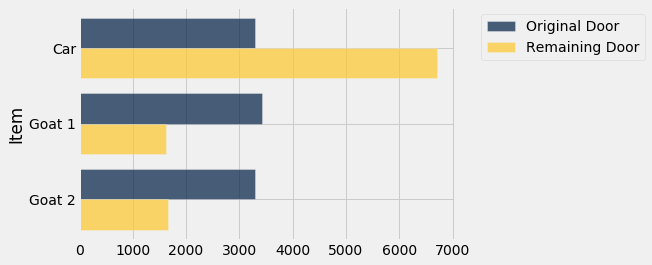

In [42]:
combined.barh(0)

Notice how the 3 blue bars are almost equal – the original choice is equally likely to be any of the 3 available items. But the gold bar corresponding to **Car** is about twice as long!

The simulation shows that the contestant is twice as likely to win if he/she switches.